In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
plt.figure(figsize=(8,7))
plt.style.use('seaborn-whitegrid')

<Figure size 576x504 with 0 Axes>

In [3]:
data=pd.read_csv(r'C:\Users\91890\Desktop\credit.csv')

In [4]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       110000 non-null  object 
 1   Customer ID                   110000 non-null  object 
 2   Loan Status                   110000 non-null  object 
 3   Current Loan Amount           110000 non-null  int64  
 4   Term                          110000 non-null  object 
 5   Credit Score                  88865 non-null   float64
 6   Annual Income                 88865 non-null   float64
 7   Years in current job          105351 non-null  object 
 8   Home Ownership                110000 non-null  object 
 9   Purpose                       110000 non-null  object 
 10  Monthly Debt                  110000 non-null  float64
 11  Years of Credit History       110000 non-null  float64
 12  Months since last delinquent  51553 non-null

#### Dropping the ID columns as this doesn't add any business value .

In [6]:
data=data.drop(['Loan ID','Customer ID'],axis=1)

In [7]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


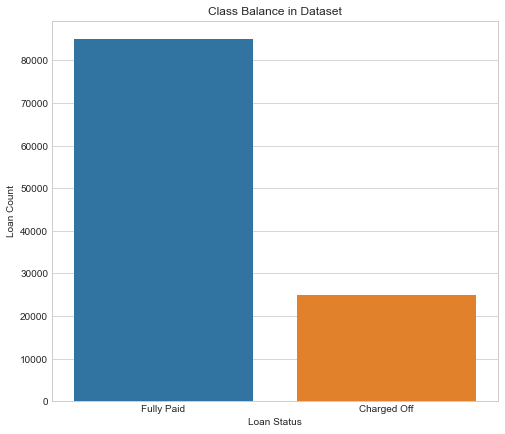

In [8]:
#Checking balance in classes
plt.figure(figsize=(8,7))
sns.countplot(data['Loan Status'])
plt.title('Class Balance in Dataset')
plt.ylabel('Loan Count')
plt.show()

In [9]:
# % of class balance
print((data['Loan Status'].value_counts()/len(data['Loan Status']))*100)

Fully Paid     77.321818
Charged Off    22.678182
Name: Loan Status, dtype: float64


#### Above is expected as generally the positive class or the Charged off class here will be a minority class .

###  Missing Value Check

In [10]:

print(data.isnull().sum())

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21135
Annual Income                   21135
Years in current job             4649
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    58447
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      226
Tax Liens                          11
dtype: int64


In [11]:
data.columns[data.isnull().any()]

Index(['Credit Score', 'Annual Income', 'Years in current job',
       'Months since last delinquent', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

## Handling Missing Values & Data Distribution Check

### Feature 1: Months since last delinquent

####  Missing Value Check .

In [12]:
data['Months since last delinquent'].unique()

array([ nan,   8.,  29.,  10.,  33.,  76.,  25.,  46.,  34.,  53.,  30.,
        32.,  21.,  50.,  20.,  24.,  15.,   6.,  13.,  48.,  69.,  42.,
        35.,   7.,  27.,   5.,  26.,  17.,  72.,  65.,   4.,  11.,  54.,
        31.,  19.,  41.,  73.,  60.,  77.,  18.,   9.,  80.,  70.,  38.,
        47.,  82.,  74.,   0.,  16.,  75.,  61.,  79.,  62.,  56.,  64.,
        36.,  39.,  59.,  55.,  37.,  58.,  68.,  22.,  45.,  14.,  51.,
        49.,   1.,  81.,  63.,  71.,  43.,  40.,  12.,  52.,   3.,  66.,
        23.,  57.,  78.,  44.,   2.,  28.,  88.,  67.,  85.,  89., 118.,
        83., 152., 120.,  92.,  86.,  94., 110.,  93.,  97.,  84., 130.,
       129., 106.,  90., 107., 176., 108.,  87., 139., 143., 114.,  91.,
       104., 115., 100., 148., 141.,  96., 131.])

In [14]:
#data.to_csv('D:\\iNeuron\\intership_2\\credit_ver1.csv',index=False)

In [15]:
data['Months since last delinquent']=data['Months since last delinquent'].replace(np.nan,0)

In [16]:
data.columns[data.isnull().any()]

Index(['Credit Score', 'Annual Income', 'Years in current job',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#### Delinquency Data Distribution .

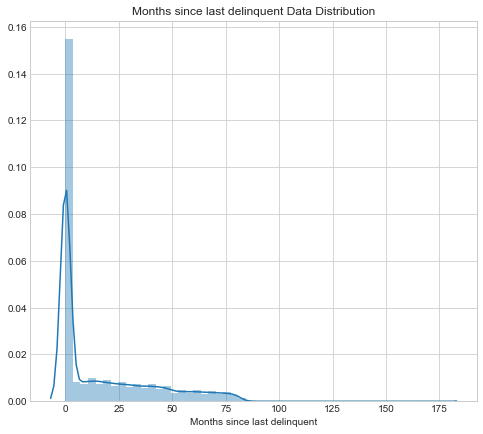

In [17]:
plt.figure(figsize=(8,7))
sns.distplot(data['Months since last delinquent'])
plt.title ('Months since last delinquent Data Distribution')
plt.show()


### Feature 2: Years in current job

#### Missing Value Check .

In [18]:
print(data['Years in current job'].isnull().sum())

4649


In [19]:
print(data['Years in current job'].unique())

['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']


[]

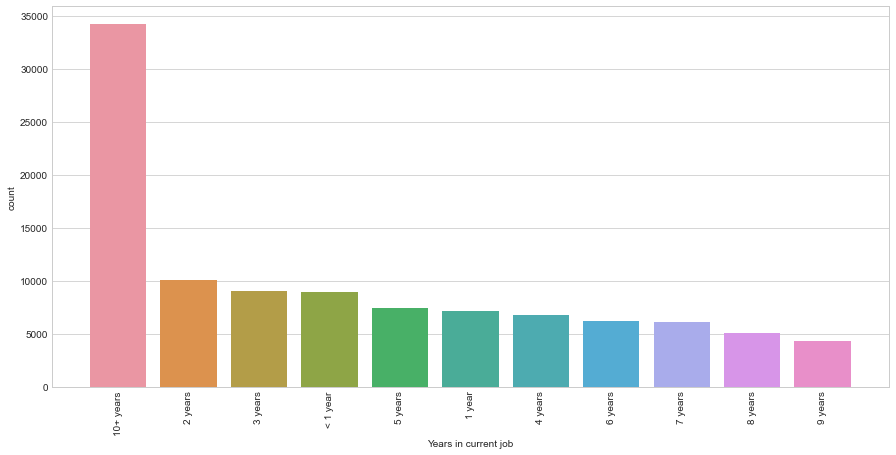

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(data['Years in current job'],order=data['Years in current job'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [22]:
##saving the current file.

#data.to_csv('D:\\iNeuron\\intership_2\\credit_ver2.csv',index=False)

In [23]:
Years=[]
for i in data['Years in current job']:
    
    if i=='8 years':
        Years.append(8)
    elif i=='6 years':
        Years.append(6)
    elif i=='3 years':
        Years.append(3)
    elif i=='5 years':
        Years.append(5)
    elif i=='< 1 year':
        Years.append(0.8)
    elif i=='2 years':
        Years.append(2)
    elif i=='4 years':
        Years.append(4)
    elif i=='9 years':
        Years.append(9)
    elif i=='7 years':
        Years.append(7)
    elif i=='1 year':
        Years.append(1)
    else :
        
        Years.append(10)

In [24]:
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x))
print(unique(Years))

[ 0.8  1.   2.   3.   4.   5.   6.   7.   8.   9.  10. ]
None


In [25]:
data['Years in current job']=Years

In [26]:
print(data['Years in current job'].unique())

[ 8.  10.   3.   5.   0.8  2.   4.   9.   7.   1.   6. ]


In [27]:
data.columns[data.isnull().any()]

Index(['Credit Score', 'Annual Income', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

#### Work Experience Data Distribution .

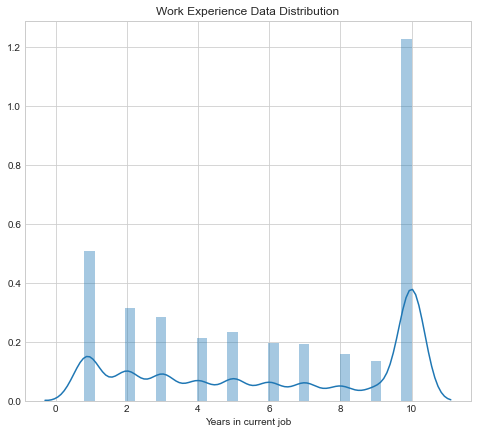

In [28]:
plt.figure(figsize=(8,7))
sns.distplot(data['Years in current job'])
plt.title ('Work Experience Data Distribution')
plt.show()

[]

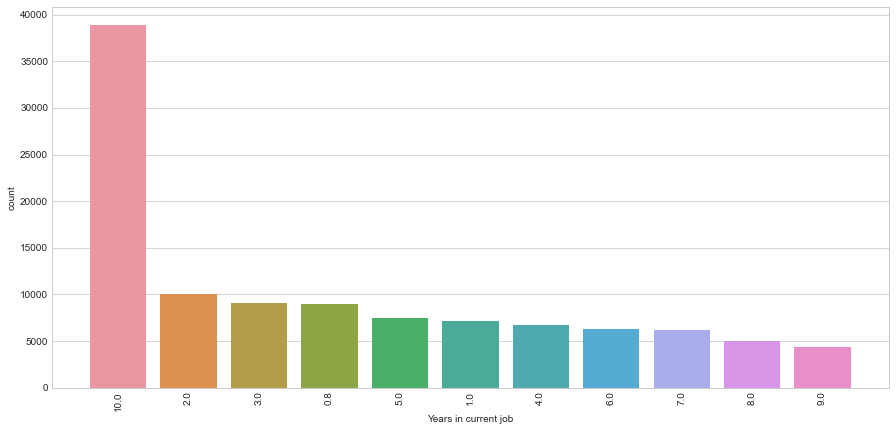

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(data['Years in current job'],order=data['Years in current job'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [ ]:
##saving the current file.

#data.to_csv('D:\\iNeuron\\intership_2\\credit_ver3.csv',index=False)

In [ ]:
#Remaining columns
data.isnull().sum()

### Feature 3: Credit Score.

#### Credit Score Data Distribution .

In [31]:
print(data['Credit Score'].describe())

count    88865.000000
mean      1076.594644
std       1475.581902
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64


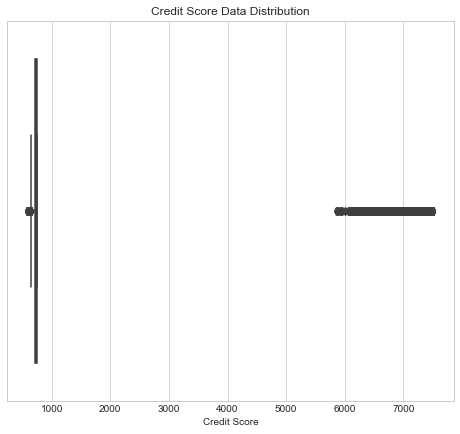

In [32]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Credit Score'])
plt.title ('Credit Score Data Distribution')
plt.show()

In [33]:
data[data['Credit Score']>900]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,Charged Off,206602,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,0.0,6,0,215308,272448.0,0.0,0.0
43,Charged Off,288948,Short Term,7120.0,537472.0,10.0,Rent,Debt Consolidation,5777.90,14.8,0.0,4,0,132468,164406.0,0.0,0.0
51,Charged Off,219692,Long Term,6610.0,527839.0,10.0,Rent,Debt Consolidation,14207.63,17.0,48.0,9,0,254277,379918.0,0.0,0.0
56,Charged Off,78012,Short Term,7380.0,728726.0,4.0,Rent,major_purchase,10135.36,11.4,0.0,8,0,104633,199936.0,0.0,0.0
65,Charged Off,523908,Long Term,7370.0,1028774.0,6.0,Home Mortgage,Debt Consolidation,22632.99,19.3,0.0,5,0,474658,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109889,Fully Paid,765534,Long Term,7200.0,2455674.0,1.0,Home Mortgage,Debt Consolidation,59345.55,17.0,0.0,10,0,196517,356642.0,0.0,0.0
109940,Fully Paid,133870,Short Term,7360.0,481745.0,3.0,Rent,Debt Consolidation,10196.92,8.0,0.0,11,0,82023,131560.0,0.0,0.0
109946,Fully Paid,124256,Short Term,7180.0,714305.0,10.0,Own Home,Debt Consolidation,19405.46,11.6,79.0,9,1,35112,110792.0,1.0,0.0
109969,Fully Paid,243782,Short Term,7340.0,1074317.0,10.0,Rent,Debt Consolidation,16383.32,20.9,51.0,12,0,194750,293260.0,0.0,0.0


In [34]:
##Handling the incorrect credit score values.

Cr_Scr=[]
for i in data['Credit Score']:
    if np.isnan(i):
        Cr_Scr.append(i)
    else :
        if float(str(i)[:3])>900:
                 Cr_Scr.append(900.0)
        else :
                 Cr_Scr.append(float(str(i)[:3]))
                 
                 
                 

In [35]:
print(len(Cr_Scr))

110000


In [36]:
data['Credit Score']=Cr_Scr

In [37]:
print(data['Credit Score'].describe())

count    88865.000000
mean       716.323930
std         28.291419
min        585.000000
25%        703.000000
50%        722.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64


In [38]:
data['Credit Score'].isnull().sum()

21135

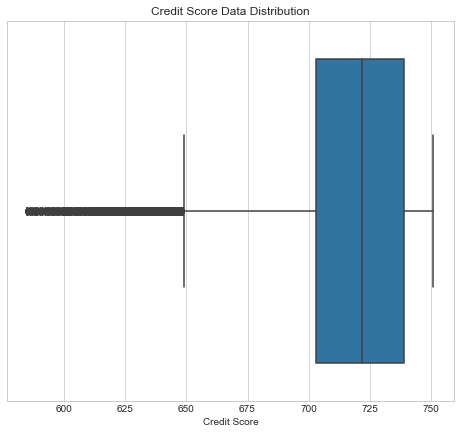

In [39]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Credit Score'])
plt.title ('Credit Score Data Distribution')
plt.show()

In [ ]:
##saving the current file.

#data.to_csv('D:\\iNeuron\\intership_2\\credit_ver4.csv',index=False)

### Feature 4: Home Ownership .

#### Data Quality Check .

[]

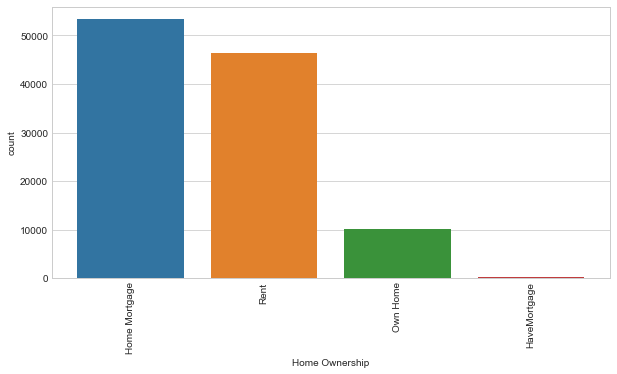

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data['Home Ownership'],order=data['Home Ownership'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [42]:
data['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [43]:
data.replace({'Home Ownership' :{'HaveMortgage':'Home Mortgage'}},inplace=True)

[]

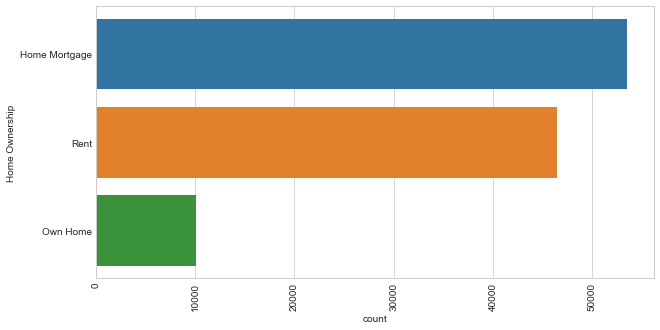

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(y=data['Home Ownership'],order=data['Home Ownership'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [ ]:
##saving the current file.

#data.to_csv('D:\\iNeuron\\intership_2\\credit_ver5.csv',index=False)

### Feature 5: Purpose .

#### Data Quality Check .

[]

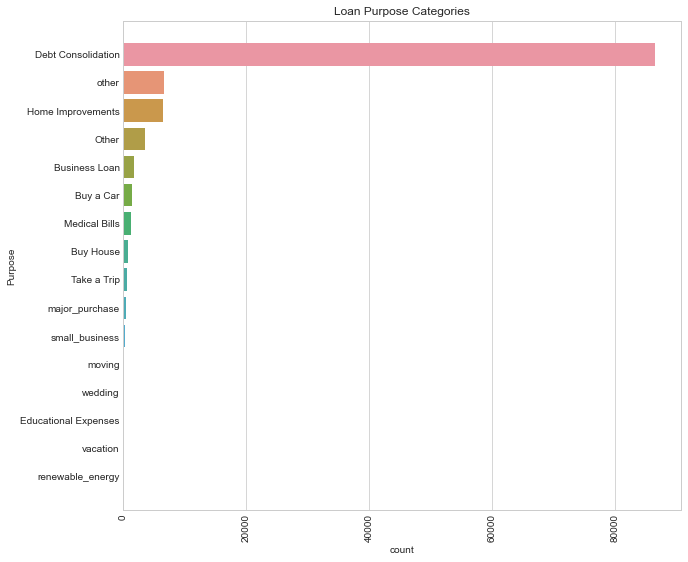

In [46]:
plt.figure(figsize=(10,9))
sns.countplot(y=data['Purpose'],order=data['Purpose'].value_counts().index)
plt.title('Loan Purpose Categories')
plt.xticks(rotation=90)
plt.plot()

In [47]:
print(data['Purpose'].unique())

['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


In [48]:
data.replace({'Purpose':{'other':'Other','Take a Trip':'vacation'}},inplace=True)

[]

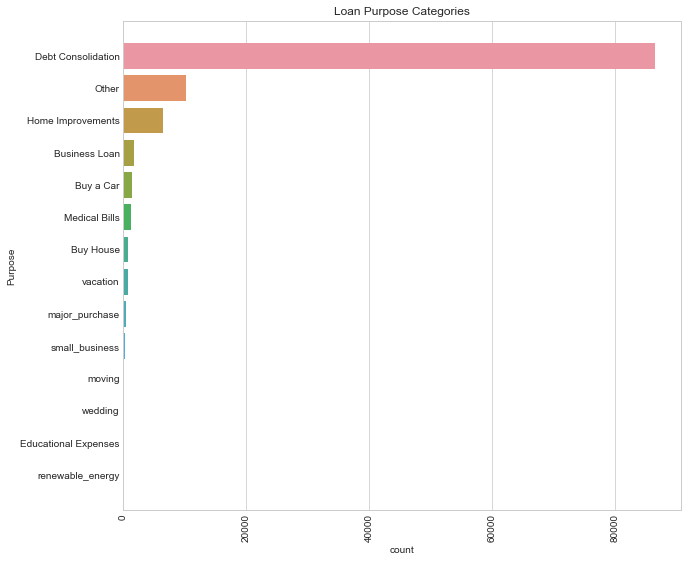

In [49]:
plt.figure(figsize=(10,9))
sns.countplot(y=data['Purpose'],order=data['Purpose'].value_counts().index)
plt.title('Loan Purpose Categories')
plt.xticks(rotation=90)
plt.plot()

In [50]:
print(data['Purpose'].unique())

['Home Improvements' 'Debt Consolidation' 'Buy House' 'Other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'vacation' 'small_business'
 'Medical Bills' 'wedding' 'Educational Expenses' 'moving'
 'renewable_energy']


In [ ]:
##saving the current file.

#data.to_csv('D:\\iNeuron\\intership_2\\credit_ver6.csv',index=False)

### Feature 6: Term .


#### Data Quality Check .

[]

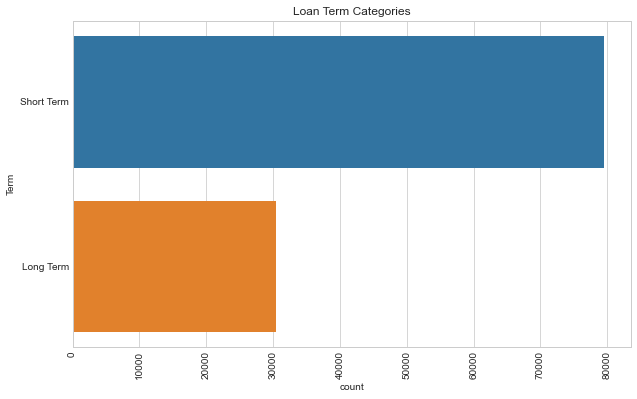

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(y=data['Term'],order=data['Term'].value_counts().index)
plt.title('Loan Term Categories')
plt.xticks(rotation=90)
plt.plot()

Looks like this feature is fine.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   110000 non-null  object 
 1   Current Loan Amount           110000 non-null  int64  
 2   Term                          110000 non-null  object 
 3   Credit Score                  88865 non-null   float64
 4   Annual Income                 88865 non-null   float64
 5   Years in current job          110000 non-null  float64
 6   Home Ownership                110000 non-null  object 
 7   Purpose                       110000 non-null  object 
 8   Monthly Debt                  110000 non-null  float64
 9   Years of Credit History       110000 non-null  float64
 10  Months since last delinquent  110000 non-null  float64
 11  Number of Open Accounts       110000 non-null  int64  
 12  Number of Credit Problems     110000 non-nul

### Imputing the data.

KNN Imputing will work only numerical columns . We will first get the numerical columns and impute them and then add them to the main dataset.

In [54]:
num_cols=data.select_dtypes(include=np.number)

In [55]:
data.select_dtypes(include=np.number).columns.to_list()

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [56]:
num_cols.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412,709.0,1167493.0,8.0,5214.74,17.2,0.0,6,1,228190,416746.0,1.0,0.0
1,262328,NaN,NaN,10.0,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,99999999,741.0,2231892.0,8.0,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,347666,721.0,806949.0,3.0,8741.90,12.0,0.0,9,0,256329,386958.0,0.0,0.0
4,176220,NaN,NaN,5.0,20639.70,6.1,0.0,15,0,253460,427174.0,0.0,0.0


In [57]:
num_cols.isnull().sum()

Current Loan Amount                 0
Credit Score                    21135
Annual Income                   21135
Years in current job                0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      226
Tax Liens                          11
dtype: int64

In [58]:
#Creating instance of KNNImputer.
impute_knn=KNNImputer()

In [59]:
trans=impute_knn.fit_transform(num_cols)

In [60]:
#Checking some dataset. Transformed data is in array format .
trans[:2,:]

array([[4.4541200e+05, 7.0900000e+02, 1.1674930e+06, 8.0000000e+00,
        5.2147400e+03, 1.7200000e+01, 0.0000000e+00, 6.0000000e+00,
        1.0000000e+00, 2.2819000e+05, 4.1674600e+05, 1.0000000e+00,
        0.0000000e+00],
       [2.6232800e+05, 7.4040000e+02, 1.4705506e+06, 1.0000000e+01,
        3.3295980e+04, 2.1100000e+01, 8.0000000e+00, 3.5000000e+01,
        0.0000000e+00, 2.2997600e+05, 8.5078400e+05, 0.0000000e+00,
        0.0000000e+00]])

In [61]:
trans_dataframe=pd.DataFrame(trans,columns=['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens'])

In [62]:
trans_dataframe.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,8.0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,740.4,1470550.6,10.0,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,3.0,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,731.6,1034287.8,5.0,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [63]:
trans_dataframe.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [64]:
trans_dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.100000e+05,110000.000000,1.100000e+05,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,1.100000e+05,1.100000e+05,110000.000000,110000.000000
mean,1.174621e+07,716.286718,1.367203e+06,6.128938,18468.526823,18.202485,16.359682,11.124491,0.168055,2.942822e+05,7.540887e+05,0.117591,0.029445
std,3.176716e+07,26.477465,9.936971e+05,3.544057,12195.564391,7.015575,23.011923,5.011093,0.484389,3.772773e+05,8.013930e+06,0.351053,0.261042
min,1.080200e+04,585.000000,7.662700e+04,0.800000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.795860e+05,704.000000,8.682240e+05,3.000000,10211.930000,13.500000,0.000000,8.000000,0.000000,1.121950e+05,2.731520e+05,0.000000,0.000000
50%,3.120260e+05,721.000000,1.182003e+06,6.000000,16202.440000,16.900000,0.000000,10.000000,0.000000,2.096650e+05,4.673790e+05,0.000000,0.000000
75%,5.239300e+05,736.400000,1.631119e+06,10.000000,23997.522500,21.700000,30.000000,14.000000,0.000000,3.674838e+05,7.831835e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,10.000000,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [65]:
print(trans_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Bankruptcies                  110000 non-null  float64
 12  Tax Liens                     110000 non-nul

In [225]:
data.select_dtypes(exclude=np.number).columns.to_list()

['Loan Status', 'Term', 'Home Ownership', 'Purpose']

In [226]:
New_Data=pd.concat([trans_dataframe,data[data.select_dtypes(exclude=np.number).columns.to_list()]],axis=1)

In [227]:
New_Data.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term,Home Ownership,Purpose
0,445412.0,709.0,1167493.0,8.0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,Fully Paid,Short Term,Home Mortgage,Home Improvements
1,262328.0,740.4,1470550.6,10.0,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
2,99999999.0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,Fully Paid,Short Term,Own Home,Debt Consolidation
3,347666.0,721.0,806949.0,3.0,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,Fully Paid,Long Term,Own Home,Debt Consolidation
4,176220.0,731.6,1034287.8,5.0,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,Fully Paid,Short Term,Rent,Debt Consolidation


In [228]:
New_Data.replace({'Loan Status':{'Fully Paid':1,'Charged Off':0},'Term':{'Short Term':1,'Long Term':0}},inplace=True)

In [229]:
New_Data

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term,Home Ownership,Purpose
0,445412.0,709.0,1167493.0,8.0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,1,1,Home Mortgage,Home Improvements
1,262328.0,740.4,1470550.6,10.0,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,1,Home Mortgage,Debt Consolidation
2,99999999.0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1,1,Own Home,Debt Consolidation
3,347666.0,721.0,806949.0,3.0,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,Own Home,Debt Consolidation
4,176220.0,731.6,1034287.8,5.0,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,1,1,Rent,Debt Consolidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,157806.0,731.0,1514376.0,6.0,4795.41,12.5,0.0,9.0,0.0,87058.0,234410.0,0.0,0.0,0,1,Rent,Debt Consolidation
109996,132550.0,718.0,763192.0,4.0,12401.87,9.9,20.0,8.0,0.0,74309.0,329692.0,0.0,0.0,1,1,Home Mortgage,Debt Consolidation
109997,223212.0,733.6,1123211.6,10.0,4354.42,27.2,0.0,8.0,1.0,99636.0,568370.0,1.0,0.0,1,0,Rent,Debt Consolidation
109998,99999999.0,721.0,972097.0,10.0,12232.20,16.8,24.0,8.0,1.0,184984.0,240658.0,0.0,0.0,1,1,Home Mortgage,Debt Consolidation


In [270]:
pd.get_dummies(New_Data.Purpose)

,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,major_purchase,moving,renewable_energy,small_business,vacation,wedding
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,0,0,0,1,0,0,0,0,0,0,0,0,0,0
109996,0,0,0,1,0,0,0,0,0,0,0,0,0,0
109997,0,0,0,1,0,0,0,0,0,0,0,0,0,0
109998,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [133]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,0.0,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,0.0,15,0,253460,427174.0,0.0,0.0


In [134]:
print(New_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Bankruptcies                  110000 non-null  float64
 12  Tax Liens                     110000 non-nul

In [135]:
New_Data.nunique()

Current Loan Amount             22502
Credit Score                      578
Annual Income                   56683
Years in current job               11
Monthly Debt                    69750
Years of Credit History           507
Months since last delinquent      116
Number of Open Accounts            52
Number of Credit Problems          14
Current Credit Balance          33641
Maximum Open Credit             46470
Bankruptcies                       13
Tax Liens                          13
Loan Status                         2
Term                                2
Home Ownership                      3
Purpose                            14
dtype: int64

In [72]:
##saving the current file.

#New_Data.to_csv('D:\\iNeuron\\intership_2\\credit_ver7.csv',index=False)

### Correlation Check

### Pearson Correlation.

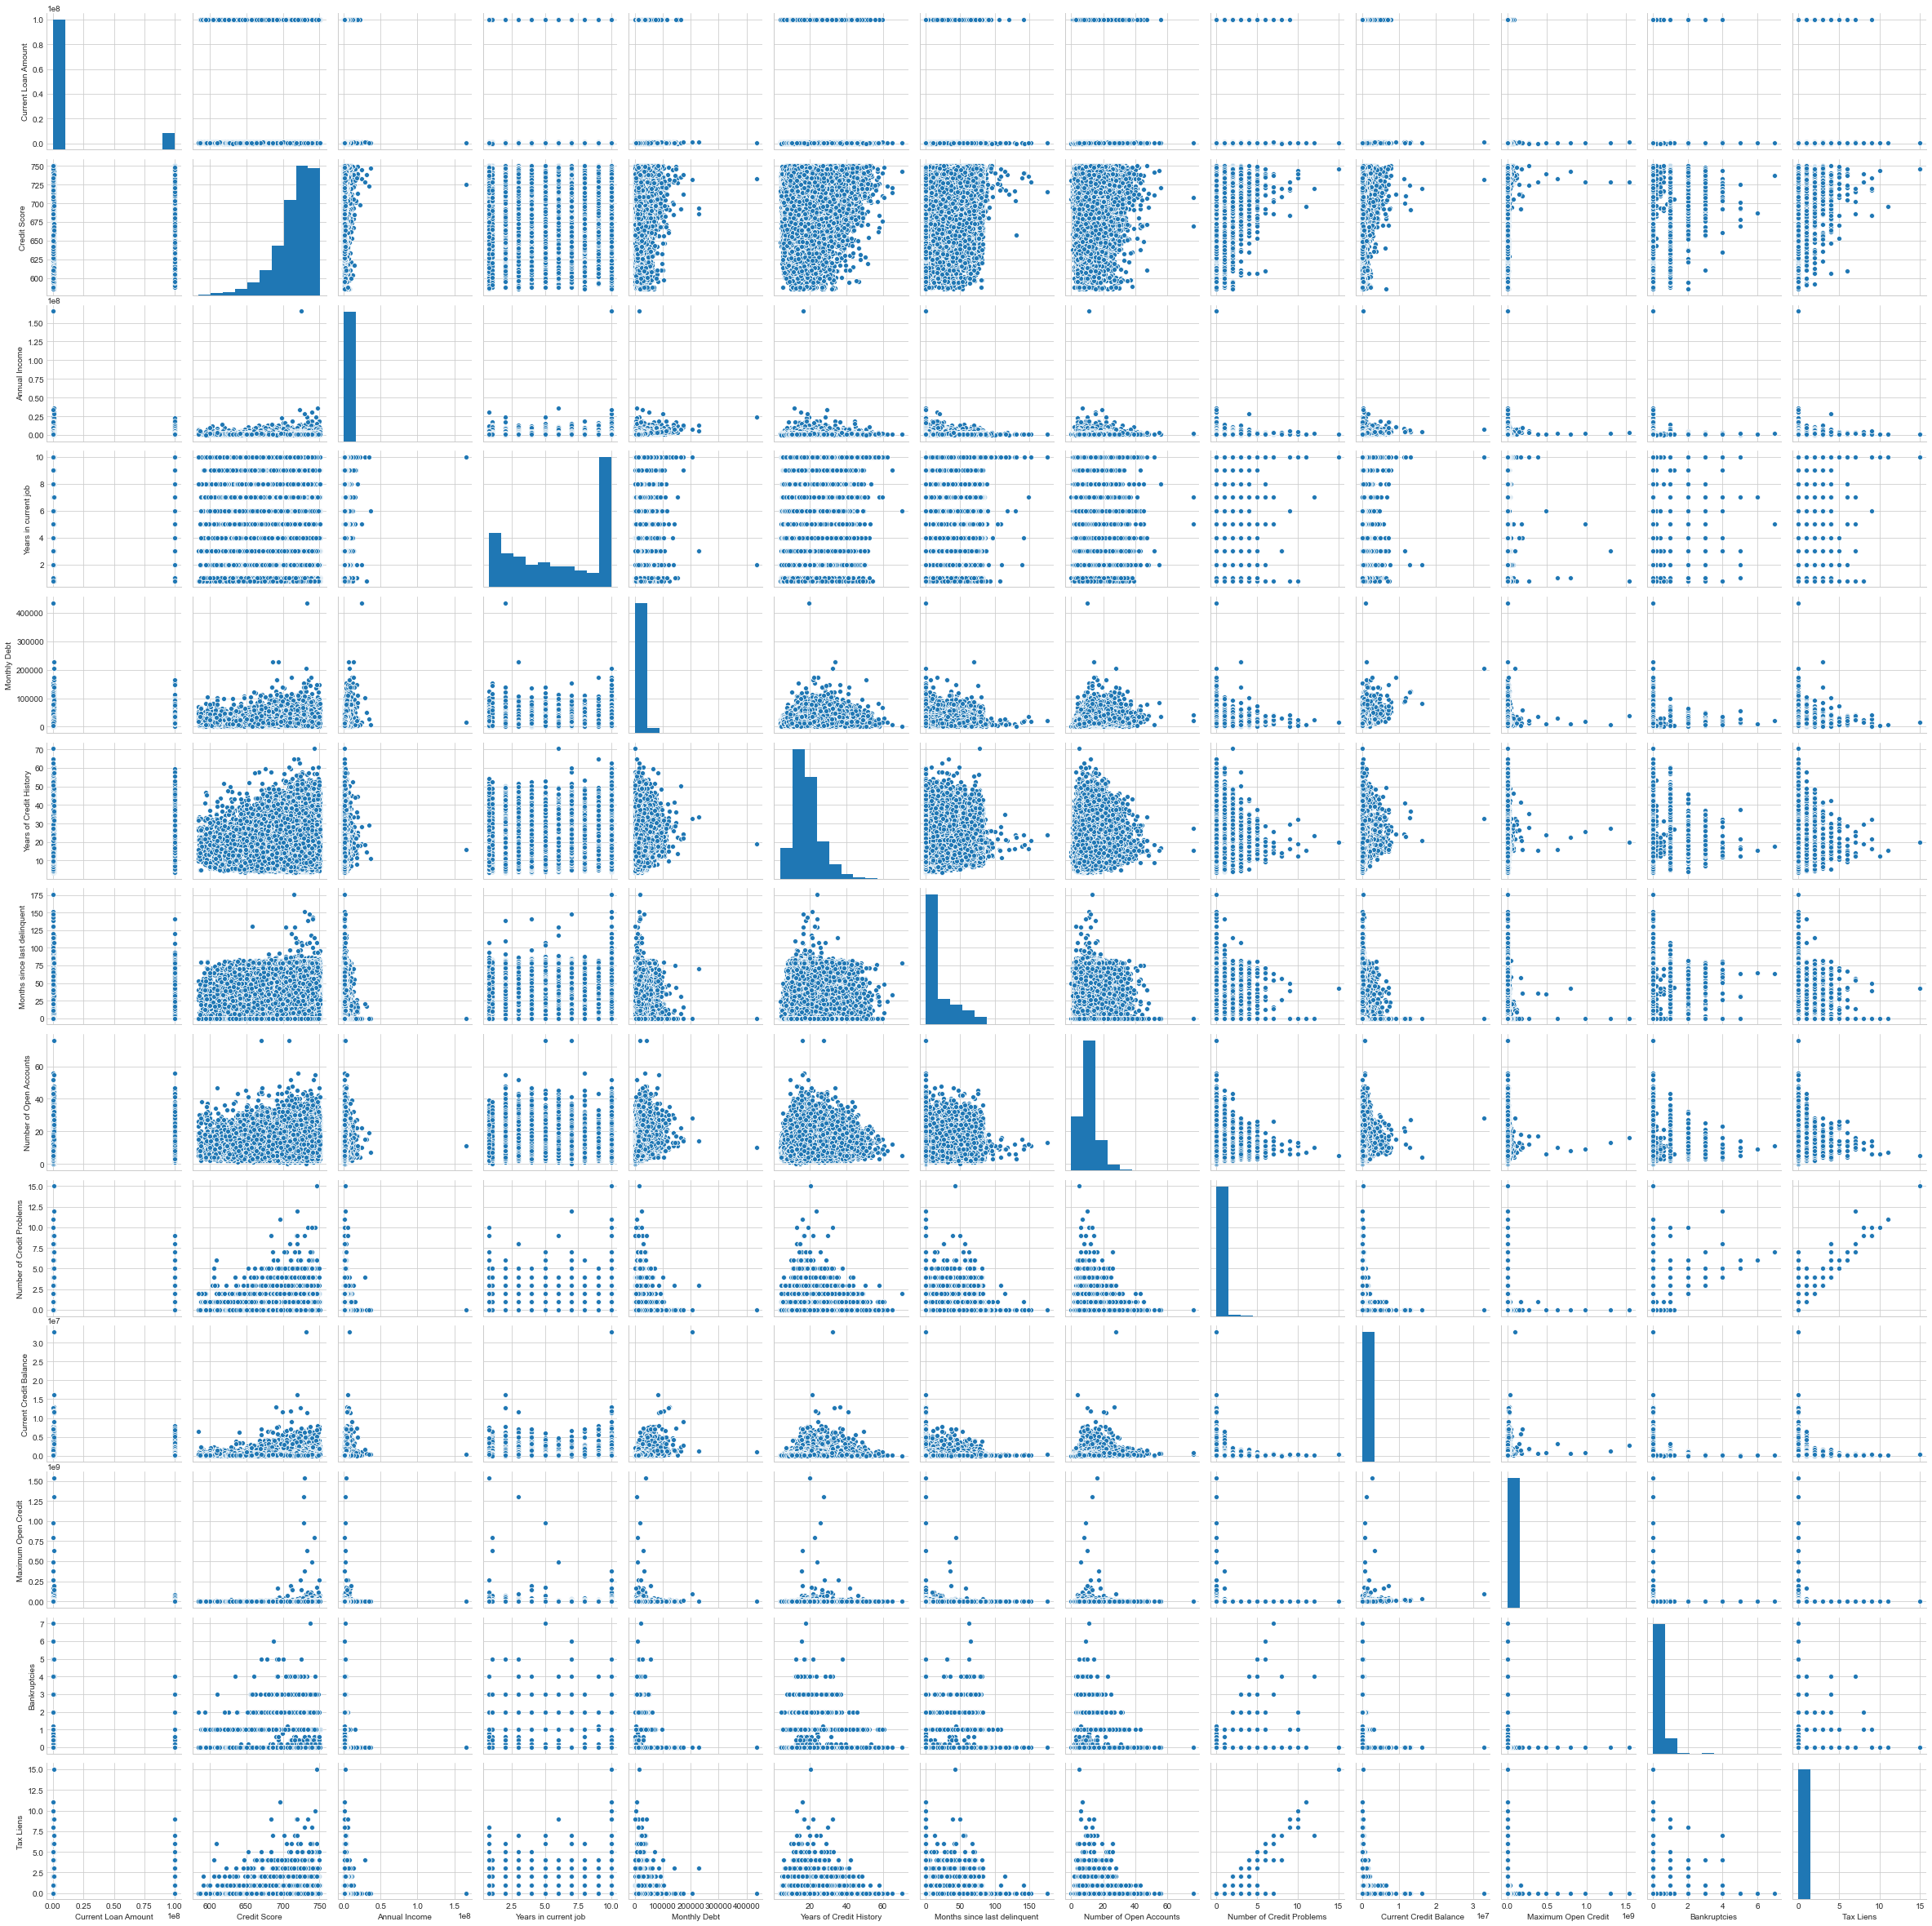

In [118]:

sns.pairplot(trans_dataframe)
plt.show()

In [119]:
corr=trans_dataframe.corr()
corr

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,0.127547,0.016255,-0.003915,-0.008013,0.019465,-0.007669,0.001149,-0.002417,0.003587,-0.001097,-0.001482,0.000139
Credit Score,0.127547,1.000000,-0.014307,-0.015110,-0.095479,0.069188,-0.051379,-0.014045,-0.041119,-0.017042,0.016417,-0.029369,-0.018538
Annual Income,0.016255,-0.014307,1.000000,0.058022,0.490095,0.165662,0.009564,0.158889,-0.022094,0.329698,0.048943,-0.053226,0.039319
Years in current job,-0.003915,-0.015110,0.058022,1.000000,0.103386,0.240717,0.045484,0.038473,0.050985,0.086800,0.001972,0.052856,0.016050
Monthly Debt,-0.008013,-0.095479,0.490095,0.103386,1.000000,0.198901,0.006329,0.411969,-0.053656,0.480003,0.040958,-0.079360,0.022508
Years of Credit History,0.019465,0.069188,0.165662,0.240717,0.198901,1.000000,0.087696,0.131977,0.062997,0.206620,0.031841,0.066827,0.018977
Months since last delinquent,-0.007669,-0.051379,0.009564,0.045484,0.006329,0.087696,1.000000,0.029454,0.079146,-0.071822,-0.011419,0.056000,0.030588
Number of Open Accounts,0.001149,-0.014045,0.158889,0.038473,0.411969,0.131977,0.029454,1.000000,-0.013503,0.226929,0.032835,-0.023827,0.007136
Number of Credit Problems,-0.002417,-0.041119,-0.022094,0.050985,-0.053656,0.062997,0.079146,-0.013503,1.000000,-0.111639,-0.012526,0.751366,0.586939
Current Credit Balance,0.003587,-0.017042,0.329698,0.086800,0.480003,0.206620,-0.071822,0.226929,-0.111639,1.000000,0.142585,-0.122420,-0.015412


In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

### Spearman Rank Correlation .

In [ ]:
corr_spear=trans_dataframe.corr(method='spearman')
corr_spear

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_spear,xticklabels=corr_spear.columns.values,yticklabels=corr_spear.columns.values)
plt.show()

In [73]:
New_Data.shape

(110000, 17)

In [91]:
# Calculating VIF for the numeric data
vif = pd.DataFrame()
vif["variables"] = trans_dataframe.columns
vif["VIF"] = [variance_inflation_factor(trans_dataframe.values, i) for i in range(trans_dataframe.shape[1])]

In [92]:
vif

,variables,VIF
0,Current Loan Amount,1.141577
1,Credit Score,13.374673
2,Annual Income,3.910798
3,Years in current job,4.252772
4,Monthly Debt,5.855366
5,Years of Credit History,8.887495
6,Months since last delinquent,1.540121
7,Number of Open Accounts,7.203893
8,Number of Credit Problems,8.546818
9,Current Credit Balance,2.246256


Looks like the credit score is higly correlated with other variables .

In [170]:
#New_Data.replace({'Loan Status':{'Fully Paid':1,'Charged Off':0},'Term':{'Short Term':1,'Long Term':0}},inplace=True)

In [171]:
New_Data.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term
0,445412.0,709.0,1167493.0,8.0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,1,1
1,262328.0,740.4,1470550.6,10.0,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,1
2,99999999.0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1,1
3,347666.0,721.0,806949.0,3.0,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0
4,176220.0,731.6,1034287.8,5.0,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,1,1


In [172]:
New_Data.isna().sum()



Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Loan Status                     0
Term                            0
dtype: int64

In [173]:
# Calculating VIF for the numeric data
vif = pd.DataFrame()
vif["variables"] = New_Data.columns
vif["VIF"] = [variance_inflation_factor(New_Data.values, i) for i in range(New_Data.shape[1])]

In [174]:
vif

,variables,VIF
0,Current Loan Amount,1.175977
1,Credit Score,20.893231
2,Annual Income,3.924473
3,Years in current job,4.264483
4,Monthly Debt,5.895602
5,Years of Credit History,8.896116
6,Months since last delinquent,1.540535
7,Number of Open Accounts,7.219305
8,Number of Credit Problems,8.547120
9,Current Credit Balance,2.247562


In [175]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(New_Data)


In [176]:
s_data=pd.DataFrame(data=scaled_data, columns= New_Data.columns)
s_data

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term
0,-0.355740,-0.275206,-0.200978,0.527946,-1.086776,-0.142895,-0.710925,-1.022634,1.717524,-0.175183,-0.042095,2.513621,-0.1128,0.541568,0.619351
1,-0.361503,0.910714,0.104003,1.092274,1.215813,0.413014,-0.363278,4.764552,-0.346943,-0.170449,0.012066,-0.334968,-0.1128,0.541568,0.619351
2,2.778158,0.933375,0.870177,0.527946,0.879996,-0.470738,0.549297,1.372064,1.717524,0.009844,-0.000499,-0.334968,-0.1128,0.541568,0.619351
3,-0.358817,0.178012,-0.563810,-0.882873,-0.797558,-0.884106,-0.710925,-0.423959,-0.346943,-0.100598,-0.045812,-0.334968,-0.1128,0.541568,-1.614593
4,-0.364214,0.578354,-0.335029,-0.318546,0.178031,-1.725096,-0.710925,0.773389,-0.346943,-0.108203,-0.040793,-0.334968,-0.1128,0.541568,0.619351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,-0.364793,0.555693,0.148107,-0.036382,-1.121160,-0.812836,-0.710925,-0.423959,-0.346943,-0.549265,-0.064847,-0.334968,-0.1128,-1.846490,0.619351
109996,-0.365589,0.064707,-0.607845,-0.600709,-0.497450,-1.183442,0.158193,-0.623518,-0.346943,-0.583057,-0.052958,-0.334968,-0.1128,0.541568,0.619351
109997,-0.362735,0.653890,-0.245540,1.092274,-1.157320,1.282511,-0.710925,-0.623518,1.717524,-0.515926,-0.023175,2.513621,-0.1128,0.541568,-1.614593
109998,2.778158,0.178012,-0.397614,1.092274,-0.511363,-0.199911,0.332017,-0.623518,1.717524,-0.289704,-0.064068,-0.334968,-0.1128,0.541568,0.619351


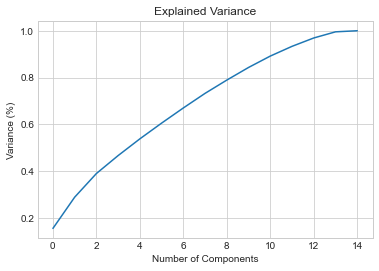

In [177]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(s_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [179]:
pca = PCA(n_components=15)
new_data = pca.fit_transform(s_data)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns= New_Data.columns)

In [180]:
principal_Df

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term
0,-1.980390,2.019241,0.208835,-0.236219,0.076212,1.074767,-0.856948,-1.160769,1.157421,-0.030427,0.383522,-0.398196,-0.252858,0.447370,-0.112766
1,2.407992,0.298363,1.382802,-0.140255,0.674290,-1.452980,0.065068,-1.380234,-2.200487,-2.871538,0.612983,1.253960,-0.092196,0.507839,-0.016403
2,0.718587,1.129924,2.220272,0.543498,-1.543002,-0.508908,0.219611,-0.201870,-1.556968,0.627061,1.313851,0.353129,0.028725,0.059038,1.462148
3,-0.713616,-0.962527,-1.060566,0.876717,-0.576698,0.520198,-0.310453,-0.024791,0.216739,-0.438943,-0.586604,0.089514,1.374727,0.086300,-0.000012
4,-0.326543,-0.955123,0.382486,1.315385,0.246306,-0.428317,-0.110508,-0.489922,-0.110897,-1.121338,0.992623,-0.054703,0.262862,-0.093419,-0.004574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,-1.140979,-0.960118,-0.380705,0.302721,1.623199,-0.161672,-0.539044,0.187622,-0.365471,0.917446,0.594160,0.457670,-0.026901,0.653297,-0.009808
109996,-1.357872,-1.025301,-0.025263,0.543693,-0.114572,-0.231902,0.459382,0.099948,0.536906,-0.429978,0.377803,-0.220483,-0.068786,-0.214596,-0.020074
109997,-1.263965,2.468425,-0.136302,-1.377773,-0.199613,1.503951,-1.280747,-1.002414,0.533609,-0.133757,-0.776221,0.677595,1.463750,0.259014,-0.101883
109998,-1.143081,0.755380,1.527403,-0.477329,-1.732622,0.637858,-0.345414,0.635882,-1.142240,0.858973,0.941744,-0.428272,-0.362195,0.029699,1.458002


In [181]:
# Calculating VIF for the numeric data
vif = pd.DataFrame()
vif["variables"] = principal_Df.columns
vif["VIF"] = [variance_inflation_factor(principal_Df.values, i) for i in range(principal_Df.shape[1])]

In [182]:
vif

,variables,VIF
0,Current Loan Amount,1.0
1,Credit Score,1.0
2,Annual Income,1.0
3,Years in current job,1.0
4,Monthly Debt,1.0
5,Years of Credit History,1.0
6,Months since last delinquent,1.0
7,Number of Open Accounts,1.0
8,Number of Credit Problems,1.0
9,Current Credit Balance,1.0


In [ ]:
print("*********"*10)

In [ ]:
sns.countplot(data_AR_CR['Loan Status'],hue=data_AR_CR['Term'])
plt.plot()